# Extract data from txt file

In [1]:
import csv

In [2]:
# Nov
stations = ['1096710','1096310','1007410','1021310','1021410','1021510','1016610','1027410','10115310','1022010','1022210']

with open('00Nov.csv', 'w') as new_file:
    csv_writer = csv.writer(new_file)
    
    for i in range(3,31):
        with open('DataSet/Traffic/Test_II/d10_text_station_5min_2019_11_{}.txt'.
                  format(str(i).zfill(2)), 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
    
            for line in csv_reader:
                if line[1] in stations:
                    csv_writer.writerow(line)

In [3]:
# 1st Dec
stations = ['1096710','1096310','1007410','1021310','1021410','1021510','1016610','1027410','10115310','1022010','1022210']

with open('00Dec.csv', 'w') as new_file:
    csv_writer = csv.writer(new_file)
    
    with open('DataSet/Traffic/Test_II/d10_text_station_5min_2019_12_01.txt', 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
    
        for line in csv_reader:
            if line[1] in stations:
                csv_writer.writerow(line)

# Process dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read saved csv files
Nov = pd.read_csv('00Nov.csv',header=None)
Dec = pd.read_csv('00Dec.csv',header=None)

In [6]:
# Trim the data (first 17 columns)
Nov = Nov.iloc[:,0:17]
Dec = Dec.iloc[:,0:17]

In [7]:
# Define dataframe header
columns = ['Timestamp','Station','District','Freeway','DoT','Lane Type','Station Length','Samples', '% Obs',
          'Total flow','Avg Occ','Ave Speed','Lane N Samples','Lane N Flow','Lane N Avg Occ','Lane N Avg Speed','Lane N obs']

In [8]:
# Input the header defined above
Nov.columns = columns
Dec.columns = columns

In [9]:
Dec.head()

,Timestamp,Station,District,Freeway,DoT,Lane Type,Station Length,Samples,% Obs,Total flow,Avg Occ,Ave Speed,Lane N Samples,Lane N Flow,Lane N Avg Occ,Lane N Avg Speed,Lane N obs
0,12/01/2019 00:00:00,1007410,10,5,N,ML,0.501,36,100,93,0.0190,70.3,9,26,0.0154,76.0,1
1,12/01/2019 00:00:00,1016610,10,5,N,ML,0.612,27,100,84,0.0209,70.5,9,19,0.0108,74.8,1
2,12/01/2019 00:00:00,1021310,10,5,N,ML,0.726,27,33,99,0.0297,63.8,9,32,0.0217,69.9,0
3,12/01/2019 00:00:00,1021410,10,5,N,ML,0.487,0,0,103,0.0316,63.5,0,37,0.0246,68.7,0
4,12/01/2019 00:00:00,1021510,10,5,N,ML,0.450,0,0,89,0.0290,66.1,0,33,0.0231,70.6,0


In [10]:
Nov.tail()

,Timestamp,Station,District,Freeway,DoT,Lane Type,Station Length,Samples,% Obs,Total flow,Avg Occ,Ave Speed,Lane N Samples,Lane N Flow,Lane N Avg Occ,Lane N Avg Speed,Lane N obs
88699,11/30/2019 23:55:00,1022210,10,5,N,ML,1.713,0,0,71.0,0.0294,63.2,0.0,25.0,0.0235,69.0,0
88700,11/30/2019 23:55:00,1027410,10,5,N,ML,1.232,0,0,83.0,0.0317,67.7,0.0,42.0,0.0286,70.0,0
88701,11/30/2019 23:55:00,1096310,10,5,N,ML,0.669,24,100,116.0,0.0279,66.3,8.0,41.0,0.0241,68.7,1
88702,11/30/2019 23:55:00,1096710,10,5,N,ML,0.249,30,100,93.0,0.0247,66.9,10.0,28.0,0.0177,71.0,1
88703,11/30/2019 23:55:00,10115310,10,5,N,ML,0.978,30,100,86.0,0.0198,66.4,10.0,10.0,0.0053,71.8,1


In [11]:
df = pd.concat([Nov,Dec],ignore_index=True)

In [12]:
len(df)

91872

In [13]:
# Pass a list of column names (the important variables)
df = df[['Timestamp','Station','Total flow']]

In [14]:
# Replace Station ID
mymap = {
            1096710  : 'f1',
            1096310  : 'f2',
            1007410  : 'f3',
            1021310  : 'f4',
            1021410  : 'f5',
            1021510  : 'f6',
            1016610  : 'f7',
            1027410  : 'f8',
            10115310 : 'f9',
            1022010  : 'f10',
            1022210  : 'f11'
        }
df['Station'] = df['Station'].map(mymap)

In [15]:
df['Station'].value_counts()

f10    8352
f4     8352
f6     8352
f2     8352
f9     8352
f5     8352
f8     8352
f3     8352
f11    8352
f1     8352
f7     8352
Name: Station, dtype: int64

In [16]:
df['Timestamp'].nunique()

8352

In [17]:
# Re-arrange the Dataframe to spatio-temporal format
df = df.pivot(index='Timestamp',columns='Station',values='Total flow')

In [18]:
df.keys()

Index(['f1', 'f10', 'f11', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9'], dtype='object', name='Station')

In [19]:
# f11 is incomplete so drop it
df.drop(columns = ['f4','f5','f8','f11'], inplace = True)

In [20]:
df

Station,f1,f10,f2,f3,f6,f7,f9
Timestamp,,,,,,,
11/03/2019 00:00:00,120.0,74.0,117.0,131.0,107.0,108.0,77.0
11/03/2019 00:05:00,122.0,73.0,120.0,125.0,134.0,139.0,94.0
11/03/2019 00:10:00,97.0,94.0,108.0,93.0,123.0,125.0,104.0
11/03/2019 00:15:00,111.0,81.0,123.0,130.0,114.0,124.0,78.0
11/03/2019 00:20:00,106.0,84.0,106.0,119.0,91.0,89.0,93.0
...,...,...,...,...,...,...,...
12/01/2019 23:35:00,115.0,107.0,125.0,134.0,114.0,129.0,97.0
12/01/2019 23:40:00,98.0,122.0,80.0,107.0,108.0,122.0,108.0
12/01/2019 23:45:00,132.0,101.0,126.0,155.0,116.0,120.0,84.0


In [21]:
# Re-arrange spatial columns, so, the data is sequential
df = df[['f1','f2','f3','f6','f7','f9','f10']]
df

Station,f1,f2,f3,f6,f7,f9,f10
Timestamp,,,,,,,
11/03/2019 00:00:00,120.0,117.0,131.0,107.0,108.0,77.0,74.0
11/03/2019 00:05:00,122.0,120.0,125.0,134.0,139.0,94.0,73.0
11/03/2019 00:10:00,97.0,108.0,93.0,123.0,125.0,104.0,94.0
11/03/2019 00:15:00,111.0,123.0,130.0,114.0,124.0,78.0,81.0
11/03/2019 00:20:00,106.0,106.0,119.0,91.0,89.0,93.0,84.0
...,...,...,...,...,...,...,...
12/01/2019 23:35:00,115.0,125.0,134.0,114.0,129.0,97.0,107.0
12/01/2019 23:40:00,98.0,80.0,107.0,108.0,122.0,108.0,122.0
12/01/2019 23:45:00,132.0,126.0,155.0,116.0,120.0,84.0,101.0


In [22]:
columns = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
df.columns = columns

In [23]:
df

,f1,f2,f3,f4,f5,f6,f7
Timestamp,,,,,,,
11/03/2019 00:00:00,120.0,117.0,131.0,107.0,108.0,77.0,74.0
11/03/2019 00:05:00,122.0,120.0,125.0,134.0,139.0,94.0,73.0
11/03/2019 00:10:00,97.0,108.0,93.0,123.0,125.0,104.0,94.0
11/03/2019 00:15:00,111.0,123.0,130.0,114.0,124.0,78.0,81.0
11/03/2019 00:20:00,106.0,106.0,119.0,91.0,89.0,93.0,84.0
...,...,...,...,...,...,...,...
12/01/2019 23:35:00,115.0,125.0,134.0,114.0,129.0,97.0,107.0
12/01/2019 23:40:00,98.0,80.0,107.0,108.0,122.0,108.0,122.0
12/01/2019 23:45:00,132.0,126.0,155.0,116.0,120.0,84.0,101.0


In [24]:
type(df.index)

pandas.core.indexes.base.Index

# Data Preprocessing II 
## Dataset integrity

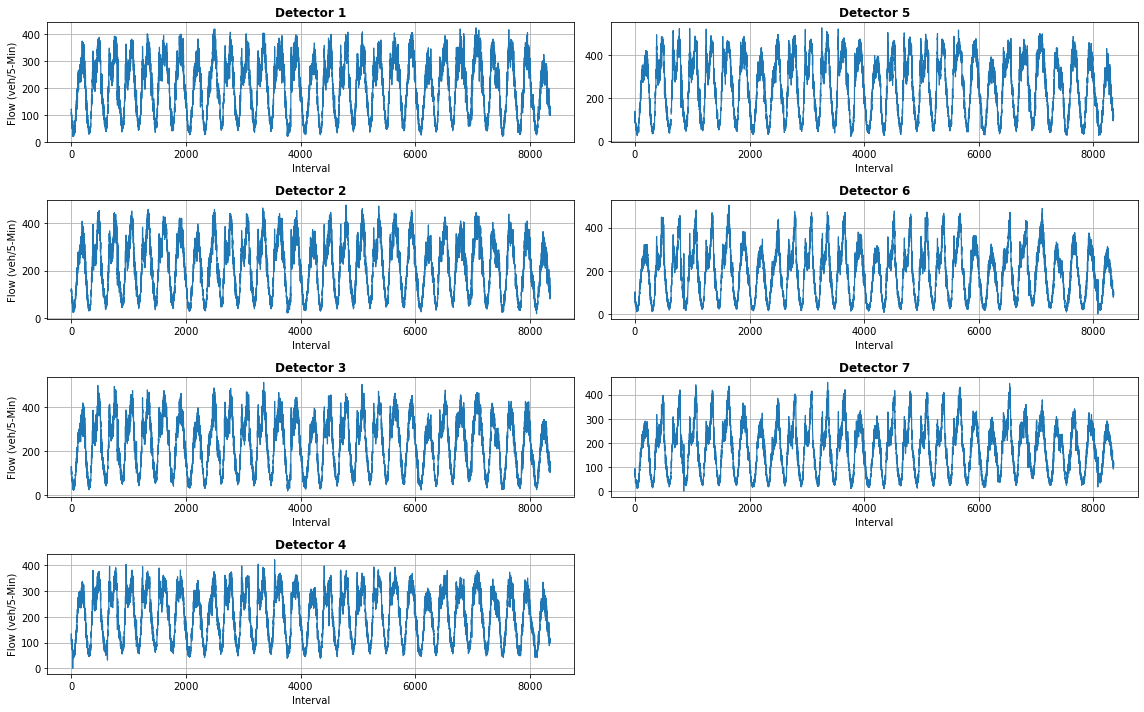

In [25]:
# plot data

# map timestamp to a variable x
x = np.linspace(0,8352,8352)

fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(16,10))

axes[0,0].plot(x,df['f1'], lw=1.2)
axes[1,0].plot(x,df['f2'], lw=1.2)
axes[2,0].plot(x,df['f3'], lw=1.2)
axes[3,0].plot(x,df['f4'], lw=1.2)
axes[0,1].plot(x,df['f5'], lw=1.2)
axes[1,1].plot(x,df['f6'], lw=1.2)
axes[2,1].plot(x,df['f7'], lw=1.2)
fig.delaxes(axes[3,1])


c = 0;
for b in range(0,2):
    for a in range(0,4):
        c += 1
        if b == 1 and a == 3:
            pass
        else:
            axes[a,b].set_xlabel('Interval')
            axes[a,b].set_title('Detector '+str(c) ,fontweight ="bold")
            axes[a,b].grid()
            if b == 0:
                axes[a,b].set_ylabel('Flow (veh/5-Min)')

plt.tight_layout()
plt.show()

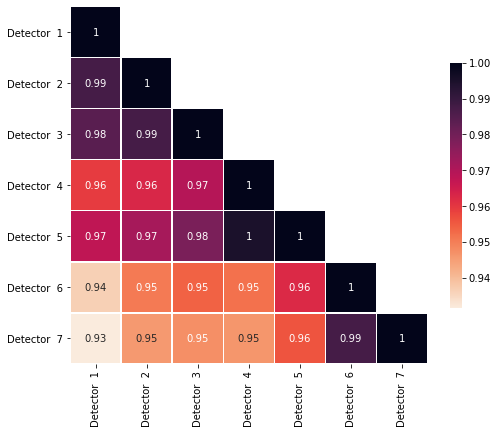

In [26]:
# The above as a plot

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

labels = ['Detector  1','Detector  2','Detector  3','Detector  4','Detector  5',
          'Detector  6','Detector  7']
crr.set_yticklabels(labels, rotation=0);
crr.set_xticklabels(labels, rotation=90);

### Check for missing values

In [27]:
df.isnull().any()

f1     True
f2     True
f3    False
f4    False
f5     True
f6    False
f7    False
dtype: bool

In [28]:
df.isnull().sum().sum()

3

In [29]:
# Use interpolation to fill in Missing Completely random (MCR) nan values
df.interpolate(inplace = True)

In [30]:
df.isnull().any()

f1    False
f2    False
f3    False
f4    False
f5    False
f6    False
f7    False
dtype: bool

### Check for missing values

In [31]:
myser1 = pd.to_datetime(df.index)

In [32]:
type(myser1)

pandas.core.indexes.datetimes.DatetimeIndex

In [33]:
# Create a date range for the specified interval using 5min fequency (as per the dataset)
date_range = pd.date_range('2019-11-03 00:00', '2019-12-01 23:59', freq='5Min')

In [34]:
myser = pd.Series(data=date_range)

# check if date range is in TrainVal timestamp and output the missing timestamps
myser[~myser.isin(myser1)]

Series([], dtype: datetime64[ns])

In [35]:
len(myser[~myser.isin(myser1)])

0

# Scale Data

In [36]:
import joblib

In [37]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

In [38]:
df_scaled = scaler.transform(df)

In [39]:
df_scaled.shape

(8352, 7)

In [40]:
df_scaled

array([[0.23608018, 0.20040486, 0.22830189, ..., 0.15608919, 0.1344697 ,
        0.14782609],
       [0.24053452, 0.20647773, 0.21698113, ..., 0.20926244, 0.16666667,
        0.14565217],
       [0.18485523, 0.18218623, 0.15660377, ..., 0.18524871, 0.18560606,
        0.19130435],
       ...,
       [0.26280624, 0.21862348, 0.27358491, ..., 0.17667238, 0.14772727,
        0.20652174],
       [0.23162584, 0.22469636, 0.21509434, ..., 0.17838765, 0.15151515,
        0.21521739],
       [0.18930958, 0.16194332, 0.17735849, ..., 0.16295026, 0.18181818,
        0.24782609]])

# Save Data

In [41]:
scaler_filename = "0000Test.save"
joblib.dump(df_scaled, scaler_filename) 

['0000Test.save']